<a href="https://colab.research.google.com/github/jhportfolio1/MsAiSchool_03_Ai_Data_Orange/blob/main/AI06_Scikit_Learn_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Scikit 라이브러리

- 머신러닝 알고리즘을 구현한 오픈소스 라이브러리
- 알고리즘 구현 : 파이썬 클래스
- 데이터셋 : Numpy, Pandas Data Frame, Scipy 희소행렬 등 사용 가능

# 2. 데이터 표현 방식

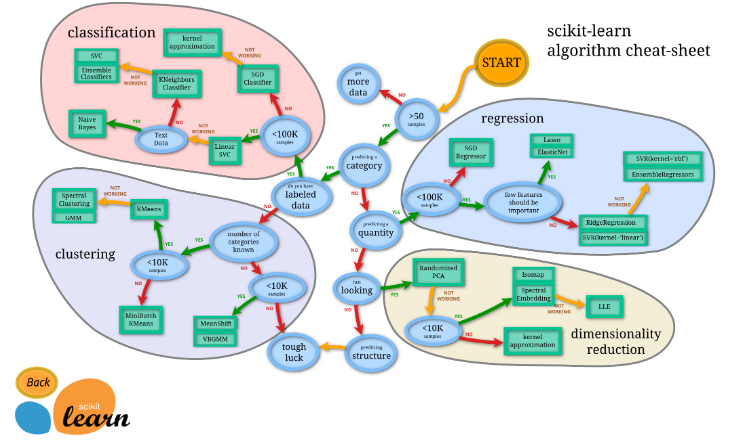

>## 1) 특징 행렬(Feature Matrix)

- 표본(sample) : 데이터셋이 설명하는 개별 객체를 나타냄 / 행렬의 행
- 특징(feature) : 각 표본을 연속적인 수칫값, 부울값, 이산값으로 표현하는 개별 관측치를 의미 / 행렬의 열 / 변수X
- n_samples : 행의개수
- n_samples, n_features 형태의 2차원 배열 구조 사용

>## 2) 대상 벡터(Target Vector)

- 연속적인 수치값, 이산 클래스/레이블을 가짐
- 길이 : n_samples
- 변수 Y에 저장
- Numpy, Pandas Series 형태의 1차원 배열 구조로 사용
- 특징 행렬로부터 예측하고자 하는 값의 벡터
- 종속 변수, 출력 변수, 결과변수, 반응 변수라고도 함

# 3. Scikit 사용방식

>## 1) scikit learn 불러오기

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

>## 2) 데이터 작업

>>### (1) 데이터 가져오기

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

- 샘플데이터 디스크립션 확인

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

>>### (2) 데이터 정의

In [4]:
data = iris.data
label = iris.target
columns = iris.feature_names

>>### (3) 데이터 확인

In [5]:
data = pd.DataFrame(data, columns=columns)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- 데이터 형태 확인

In [6]:
data.shape

(150, 4)

>>### (4) 데이터 쪼개기

- 총 150개의 데이터를 학습용 데이터와 테스트 데이터로 나눠야 함

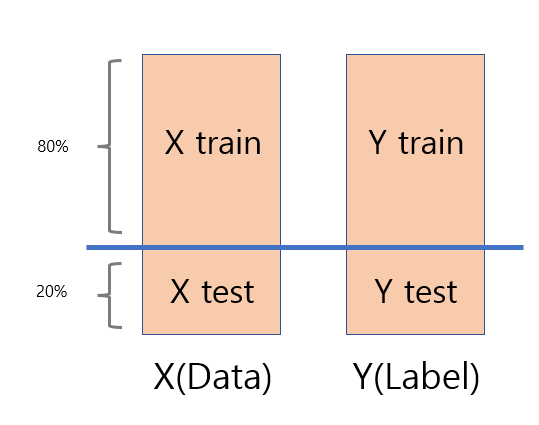

- 4개의 데이터로 분리됨

In [7]:
from sklearn.model_selection import train_test_split
train_test_split(data, label, test_size=0.2, random_state=2023)   #randomstate(데이터를 섞는 힘) 값은 임의로 설정

[     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 9                  4.9               3.1                1.5               0.1
 38                 4.4               3.0                1.3               0.2
 18                 5.7               3.8                1.7               0.3
 119                6.0               2.2                5.0               1.5
 98                 5.1               2.5                3.0               1.1
 ..                 ...               ...                ...               ...
 52                 6.9               3.1                4.9               1.5
 116                6.5               3.0                5.5               1.8
 3                  4.6               3.1                1.5               0.2
 25                 5.0               3.0                1.6               0.2
 87                 6.3               2.3                4.4               1.3
 
 [120 rows x 4 columns],
      sepal length (cm)  

- 분리된 4개의 데이터에 각각 이름을 붙여줌

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2023)

# 3. Supervised Learning

>## 1) Classification-Logistic Regression 적용

>>### (1) Classification
- 데이터의 카테고리 관계 파악 및 새로운 데이터 카테고리 스스로 판별하는 과정
- 하나 이상의 관측 데이터를 통해 하나 이상의 분류 값을 예측

>>### (2) Logistic Regression
- 선형회귀모델에서 변형된 로지스틱 회귀</br>
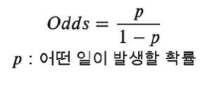

>>### (3) 트레이닝 적용 후 예측

- 트레이닝 데이터 적용

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [10]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

- 테스트용 데이터 넣어서 예측시킨 것

In [11]:
y_pred = lr.predict(X_test)

In [12]:
y_pred

array([2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 2, 1, 0])

- 테스트용 데이터의 진짜 라벨 데이터

In [13]:
y_test

array([2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 2, 1, 0])

- 예측데이터와 테스트용 데이터의 라벨데이터를 비교해서 모델의 정확도 판단

>## 2) 결과 확인

>>### (1) Accuracy (제일먼저 봄)

- Accuracy 불러오기

In [14]:
from sklearn.metrics import accuracy_score

- Accuracy 적용하기

In [15]:
accuracy_score(y_test, y_pred)    #1.0 = 100% / 오버피팅 가능성 높음

1.0

In [16]:
print('로지스틱 회귀 정확도 : {:.2f}'.format(accuracy_score(y_test, y_pred)*100))

로지스틱 회귀 정확도 : 100.00


>>### (2) 계수와 절편 확인

- 꽃받침 길이 / 넓이, 꽃잎 길이 / 넓이 총 4개의 값이 기울기(w계수)로 나타남

In [17]:
print('로지스틱 회귀, \n계수(w) : {0}\n절편 : {1}'.format(lr.coef_, lr.intercept_))

로지스틱 회귀, 
계수(w) : [[-0.44734561  0.8926404  -2.33623964 -1.03295779]
 [ 0.49390809 -0.33483512 -0.19125056 -0.85050783]
 [-0.04656248 -0.55780528  2.5274902   1.88346562]]
절편 : [  9.47258972   2.14495508 -11.6175448 ]


>## 3) Classification - Support Vector Machine

>>### (1) Support Vector Machine 
-  두 카테고리 사이의 간격을 데이터 포인트로 찾아내고 그 서포트 벡터에 수직인 경계를 통해 데이터를 분류하는 알고리즘  

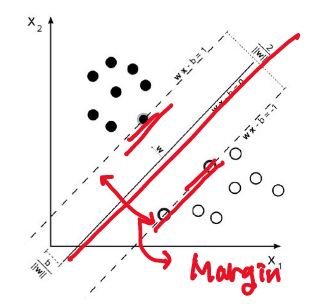

>>### (2) 적용 (학습 및 예측)

- 적용

In [18]:
from sklearn.svm import SVC
svc = SVC()

In [19]:
svc.fit(X_train, y_train)

SVC()

- 예측

In [20]:
y_pred = svc.predict(X_test)

In [21]:
print('서포트 벡터 머신, 정확도 : {:.2f}'.format(accuracy_score(y_test, y_pred)*100))

서포트 벡터 머신, 정확도 : 100.00


- SVC C값 1로 수정해서 실행한다면? 

In [22]:
from sklearn.svm import SVC
svc = SVC(C=1)       #C값을 높게주면 노이즈 무시하고 정확도 올라감
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('서포트 벡터 머신, 정확도 : {:.2f}'.format(accuracy_score(y_test, y_pred)*100))

서포트 벡터 머신, 정확도 : 100.00


>>### (3) for 문 + C값 변경을 이용해서 데이터 정확도 올려보기

In [23]:
for i in [0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1]:
  svc = SVC(C=i)       
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  print('서포트 벡터 머신, i={} 정확도 : {:.2f}'.format(i,accuracy_score(y_test, y_pred)*100))

서포트 벡터 머신, i=0.1 정확도 : 90.00
서포트 벡터 머신, i=0.2 정확도 : 100.00
서포트 벡터 머신, i=0.3 정확도 : 100.00
서포트 벡터 머신, i=0.4 정확도 : 100.00
서포트 벡터 머신, i=0.5 정확도 : 100.00
서포트 벡터 머신, i=0.6 정확도 : 100.00
서포트 벡터 머신, i=0.7 정확도 : 100.00
서포트 벡터 머신, i=0.8 정확도 : 100.00
서포트 벡터 머신, i=0.9 정확도 : 100.00
서포트 벡터 머신, i=1 정확도 : 100.00


>## 4) Claasification - Support Vectoc Machine 2

- 깔끔하게 주황색/파랑색으로 안나눠질 때

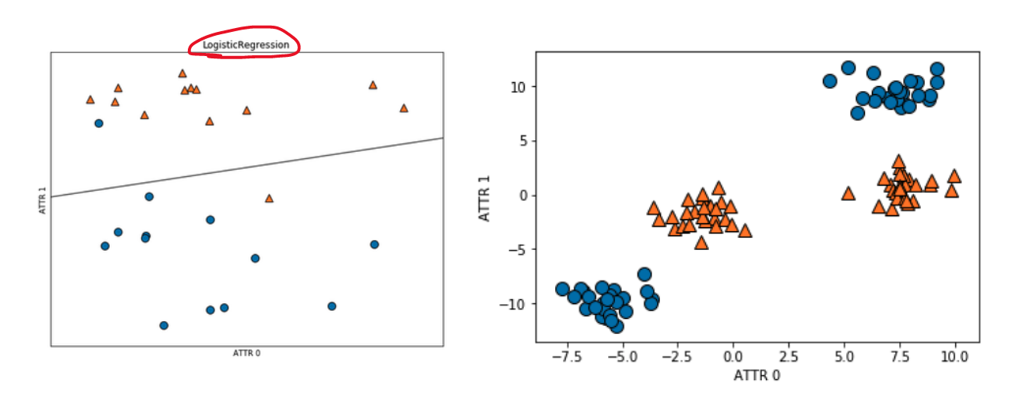

- 2차원에서 선으로 자르기 어려운 경우, 차원을 늘려서 자른다.

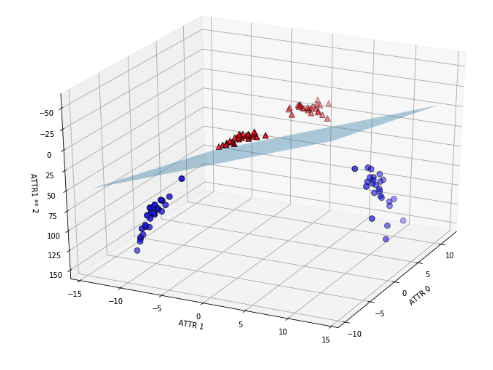

>## 5) Classification - Decision Tree(의사결정 나무)

>>### (1) Decision Tree
- 입력 변수를 특정한 기준으로 분기해서 트리 형태의 구조로 분류하는 모델
- IF문 덩어리임
- 결과는 나무 모양으로 그려질 수 있음 
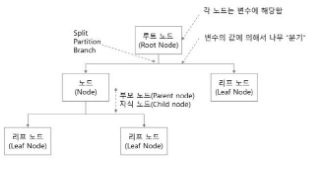

>>### (2) 적용
- 불러오기

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)      #depth로 트리 단계 설정 가능

In [60]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Tree 정확도: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

Tree 정확도: 100.00%


>>- 모델 안에 있는 구성을 tree.dot으로 저장하게 함

In [61]:
from sklearn.tree  import export_graphviz

export_graphviz(dt, out_file='tree.dot')

>>- 파일안에는 이 모델의 계층적 구조가 들어있음

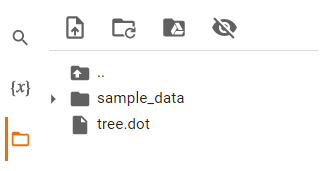

>>- 하위 계층을 그림으로 그려보자

In [62]:
from subprocess import call

In [76]:
call(['dot','-Tpng','tree.dot','decision-tree.png','-Gdpi=200'])    #call [표현방법, 선명도, 파일명, 저장할이름,해상도 ]

1

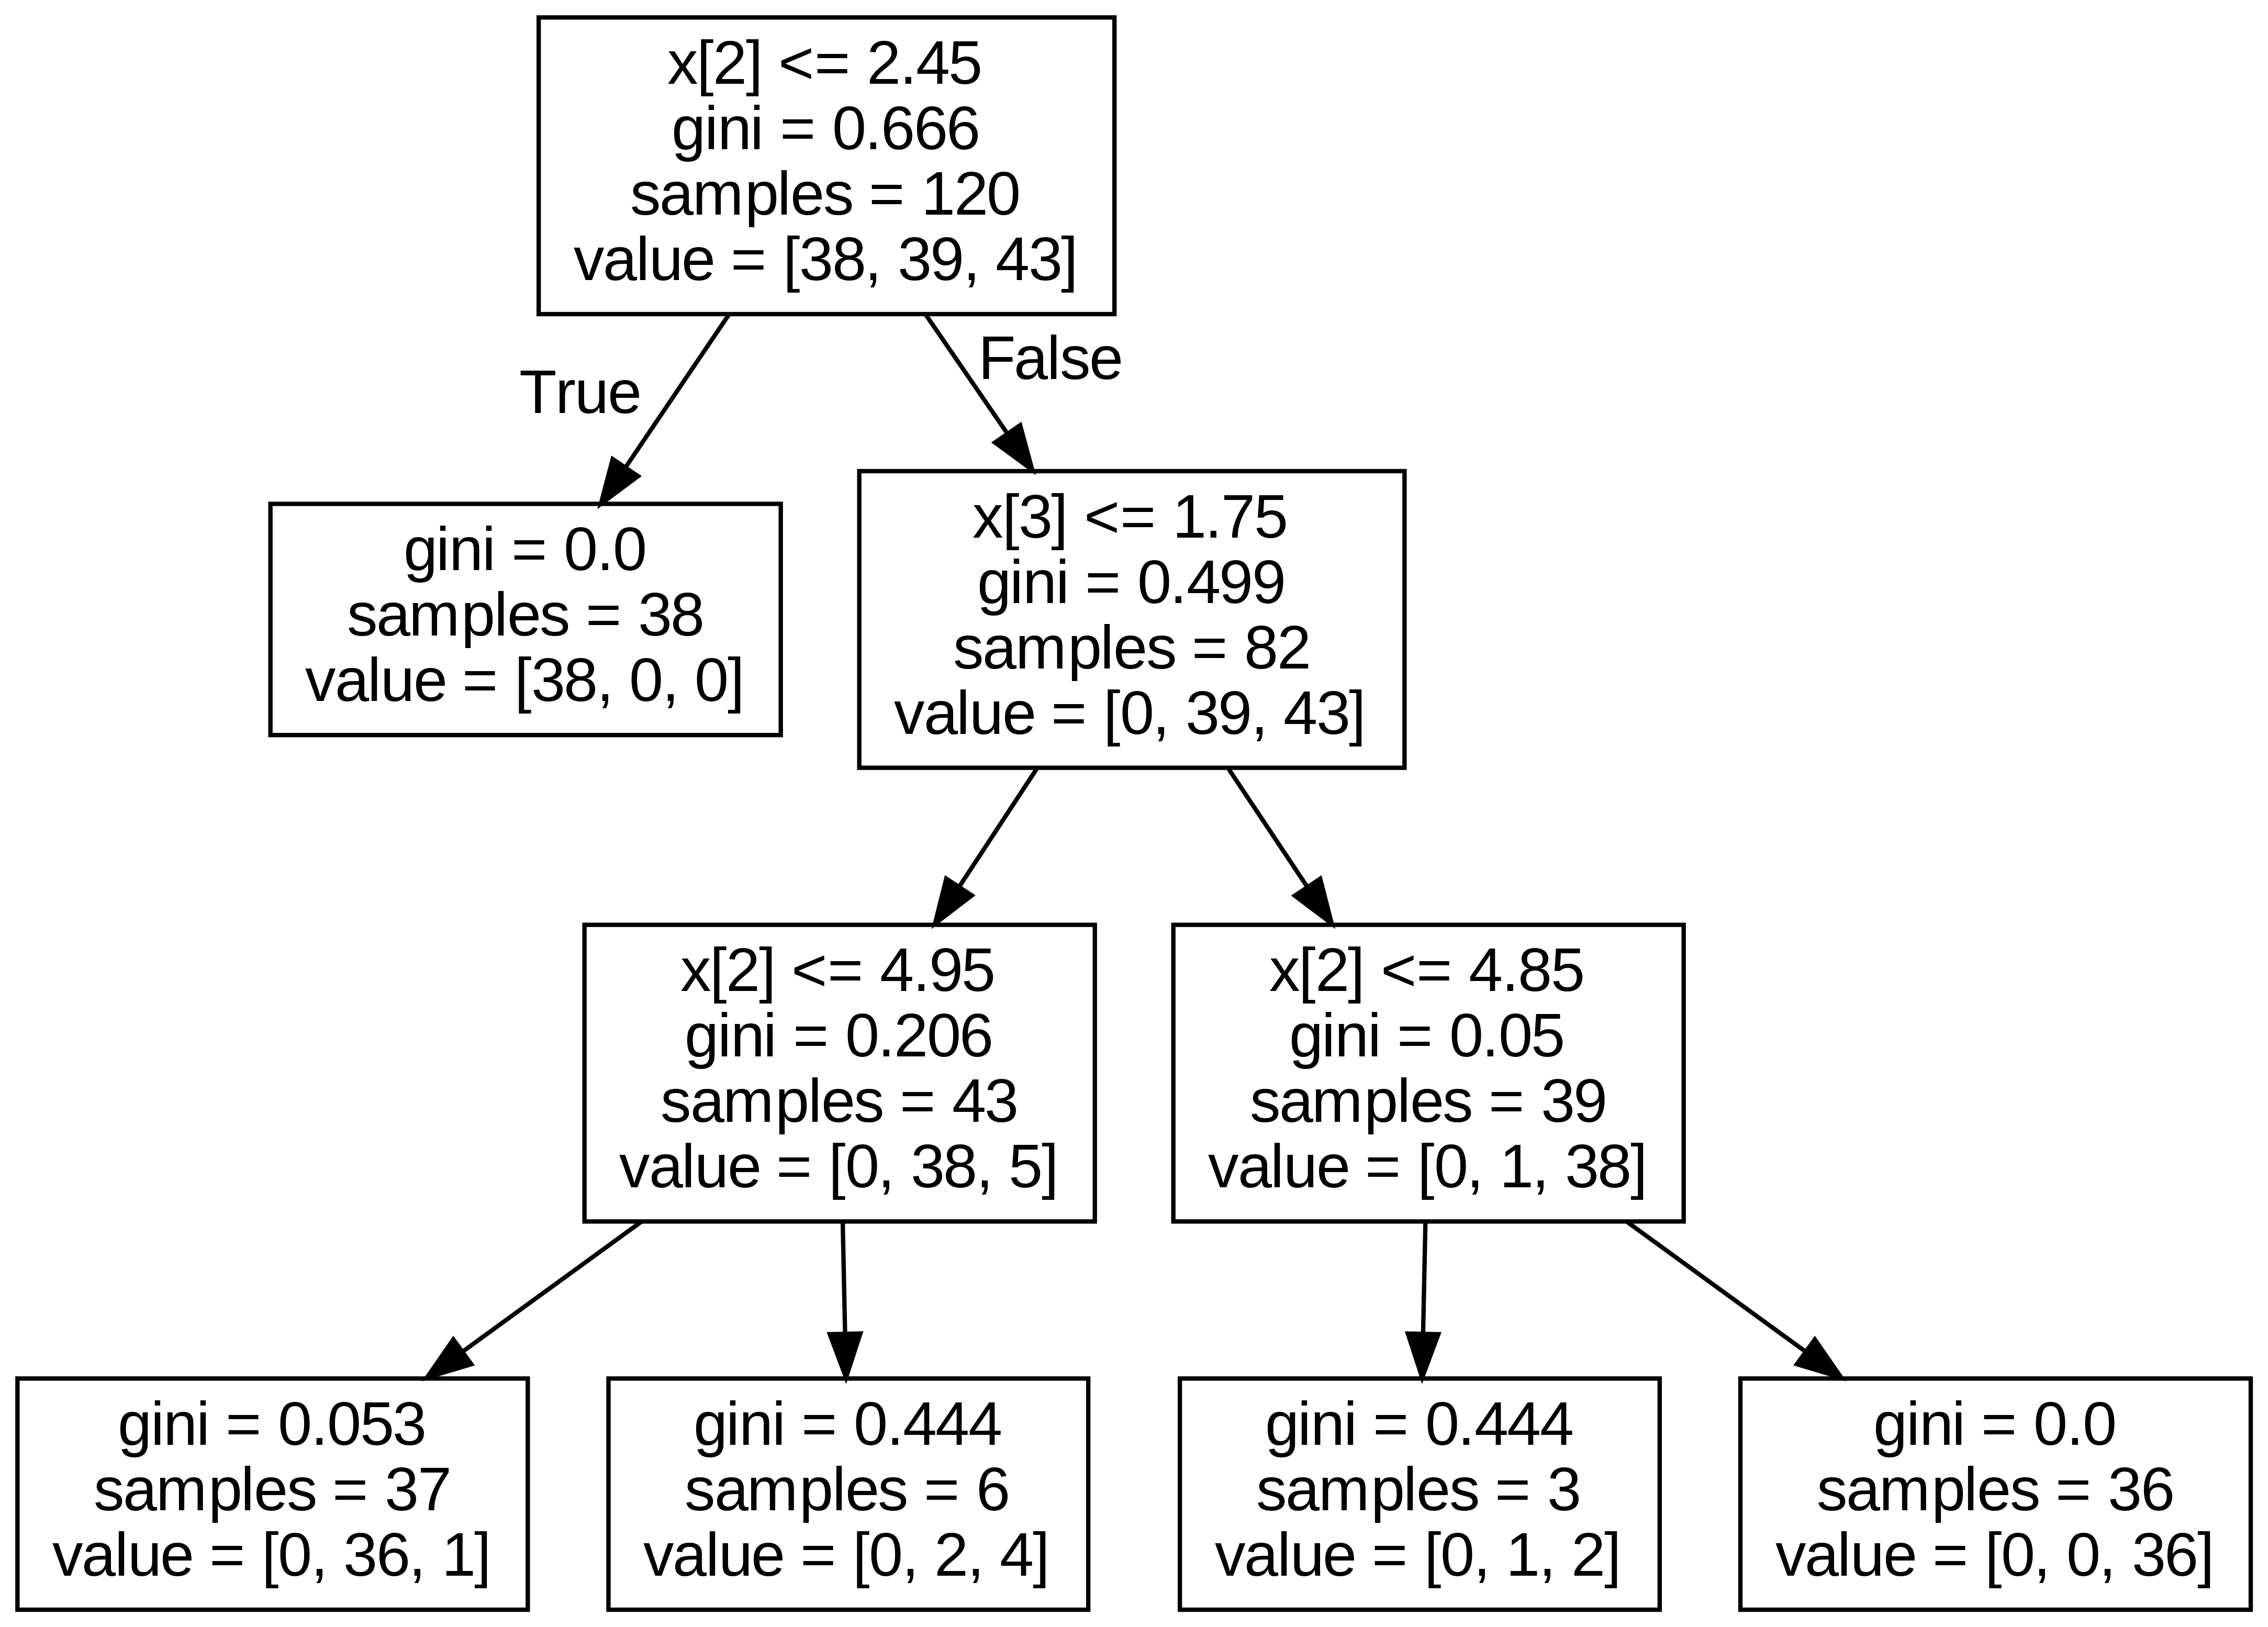

In [72]:
from IPython.display import Image
Image(filename = 'decision-tree.png')

>>### (3) Forest (나무의 집합)

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('랜덤 포레스트 정확도: {:.2f}'.format(accuracy_score(y_test, y_pred)*100))

랜덤 포레스트 정확도: 100.00


>## 6) Classification 평가

>>### (1) Accuracy 정확도
- 모든 데이터에 대해 클래스 라벨을 얼마나 잘 맞혔는지 계산함
- 전체에서 값이 같은 것의 비율
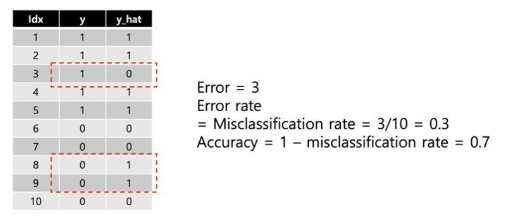

>>### (2) Confusion Matrix
- 정확도 만으로는 리스크가 있어서 분류 모델 평가해야 함
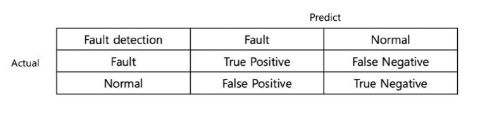
</br>
</br>
- Precision(정밀도) :  1이라고 예측한 것 중 실제로 1인 것
- Sensitive(민감도) : True Positive rate = Recall = Hit Ratio = 실제로 1인 것중에 1이라고 예측한 것
- Specificity(특이도) : True Negative rate = 실제로 0인 것 중에 0이라고 예측한 것
- False Alarm(오탐) = False Positive rate = 1-specificity = 실제로 0인것 중에 1이라고 예측한 것

# 3. 실습

>## 1) ablaone 데이터 분석

>>### (1) 데이터 불러와서 판다스로 표현하기

In [78]:
import os
from os.path import join

abalone_path = join('.','abalone.txt')
column_path = join('.','abalone_attributes.txt')

abalone_columns = list()
for l in open(column_path):
  abalone_columns.append(l.strip())

In [80]:
data = pd.read_csv(abalone_path, header=None, names=abalone_columns)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


>>### (2) 데이터 선별
- 성별이 'I' 아닌 것을 숫자로 바꿈
- 데이터를 숫자로 바꾸는 경우 가벼워짐

In [87]:
data = data[data['Sex'] !='I']

label = data['Sex'].map(lambda x:0  if x=='M' else 1)
label

0       0
1       0
2       1
3       0
6       1
       ..
4172    1
4173    0
4174    0
4175    1
4176    0
Name: Sex, Length: 2835, dtype: int64

In [88]:
del data['Sex']
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


>>### (3) 데이터 쪼개기

In [90]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2023)

In [93]:
rf = RandomForestClassifier(max_depth = 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

>>### (4) 정확도 분석
- Accuracy score
- Precision score
- Recall Score
- roc_auc_score
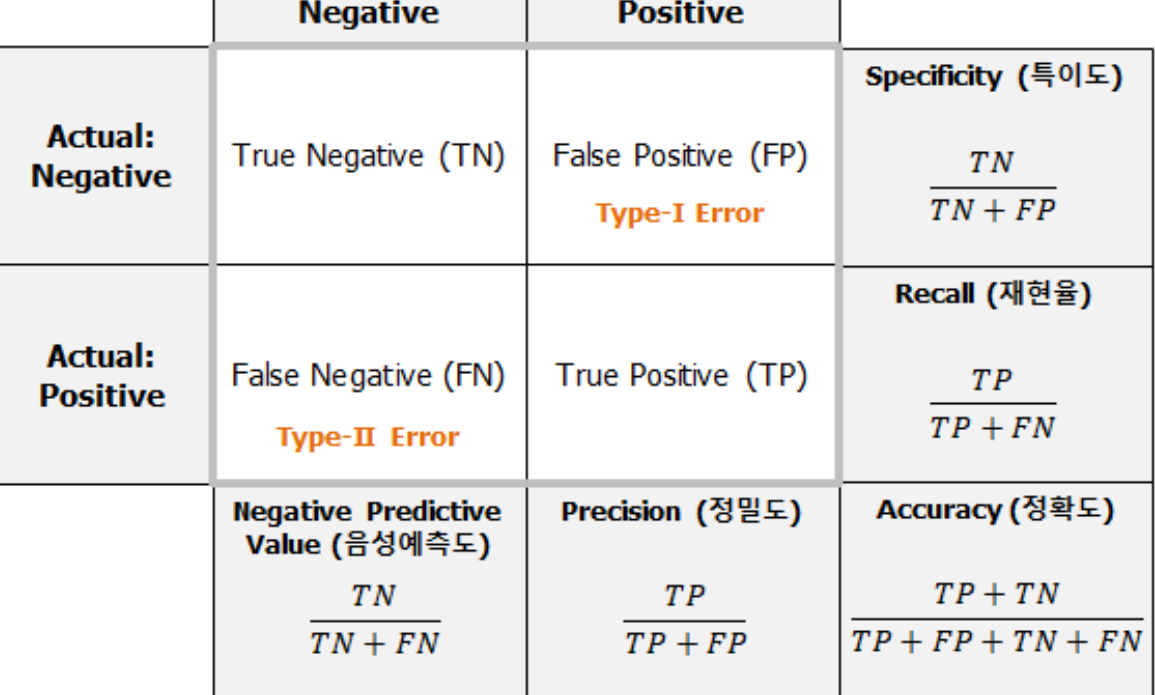

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [96]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

Accuracy: 0.53
precision: 0.54
recall: 0.25
AUC: 0.53


>>### (5) 최적 모델 찾기

In [102]:
best_model_depth = 0
best_model_accuracy = 0

for i in [2,3,4,5,6,7,8,9,10]:
  rf = RandomForestClassifier(max_depth=i)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)

  acc = accuracy_score(y_test, y_pred)

  print('Accuracy : i={} {:.2f}'.format(i, acc*100))

  if best_model_accuracy < acc:
    best_model_depth = i
    best_model_accuracy = acc

print('--------------------------------')
print('best_model_depth= {0}, best_model_accuracy= {1}'.format(best_model_depth, best_model_accuracy))

Accuracy : i=2 51.85
Accuracy : i=3 52.03
Accuracy : i=4 50.97
Accuracy : i=5 54.14
Accuracy : i=6 55.38
Accuracy : i=7 52.73
Accuracy : i=8 53.79
Accuracy : i=9 53.97
Accuracy : i=10 53.79
--------------------------------
best_model_depth= 6, best_model_accuracy= 0.5537918871252204
